# 0. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mitosheet 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import random
from faker import Faker
from datetime import datetime
%matplotlib inline

# 1. Data Importation & Cleaning

In [2]:
data = pd.read_csv(r'C:\Users\odigi\Desktop\Data Science\Projects\Instacart\Dataset\all_joined.csv')

In [3]:
data

,aisle_id,aisle,product_id,product_name,department_id,selling_price,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,date
0,1,prepared soups salads,209,Italian Pasta Salad,20,14.77,deli,36461,6,1,50978,train,7,6,13,20.0,2018-09-04
1,1,prepared soups salads,12398,Caprese Salad,20,33.88,deli,36461,7,0,50978,train,7,6,13,20.0,2018-09-04
2,13,prepared meals,25407,Mashed Potatoes,20,15.99,deli,36461,5,0,50978,train,7,6,13,20.0,2018-09-04
3,108,other creams cheeses,27323,Pure & Natural Sour Cream,16,21.31,dairy eggs,36461,1,1,50978,train,7,6,13,20.0,2018-09-04
4,108,other creams cheeses,40593,Cream Cheese,16,7.84,dairy eggs,36461,11,1,50978,train,7,6,13,20.0,2018-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,100,missing,48811,General Tsao's Tofu,21,19.30,missing,2712617,1,0,175174,prior,4,0,17,14.0,2018-05-09
33819102,100,missing,48813,Lndbrg Wht Jasm Rice 8 Z,21,20.80,missing,1717868,1,0,7431,prior,24,2,11,30.0,2018-09-15
33819103,100,missing,48828,Popcorn Butter Flavor,21,17.17,missing,832621,1,0,75414,prior,24,1,13,7.0,2018-05-21
33819104,100,missing,49482,Black Tea With Vanilla Flavor In Pyramid Bags,21,21.12,missing,2868431,1,0,38108,prior,39,3,9,4.0,2018-06-10


In [4]:
## Get FMC
data_group = data.groupby(['user_id','order_id'])['selling_price'].sum().reset_index() #group by user_id and order_id to get total selling price

In [5]:
data_group

,user_id,order_id,selling_price
0,1,431534,165.05
1,1,473747,91.76
2,1,550135,84.77
3,1,1187899,176.74
4,1,2254736,83.23
...,...,...,...
3346078,206209,2307371,61.15
3346079,206209,2558525,68.46
3346080,206209,2977660,144.79
3346081,206209,3154581,278.37


In [6]:
data_group2 = data.groupby(['user_id','order_id']).agg({'date': lambda x: x.max(),
                                                          'selling_price': 'sum'}).reset_index() # create orders by users with date

In [7]:
data_group2

,user_id,order_id,date,selling_price
0,1,431534,2018-03-21,165.05
1,1,473747,2018-09-22,91.76
2,1,550135,2018-05-28,84.77
3,1,1187899,2018-06-21,176.74
4,1,2254736,2018-07-10,83.23
...,...,...,...,...
3346078,206209,2307371,2018-11-22,61.15
3346079,206209,2558525,2018-12-19,68.46
3346080,206209,2977660,2018-06-04,144.79
3346081,206209,3154581,2018-10-10,278.37


In [8]:
data_group2['date'] = pd.to_datetime(data_group2['date'], infer_datetime_format=True, errors='coerce')

In [9]:
data_group2.dtypes

user_id                   int64
order_id                  int64
date             datetime64[ns]
selling_price           float64
dtype: object

In [10]:
import datetime

In [11]:
time_stamp = max(data_group2['date']) + datetime.timedelta(days=1)
time_stamp

Timestamp('2018-12-31 00:00:00')

In [12]:
data_prod_count = data.groupby('user_id')['product_id'].nunique().to_frame().reset_index() #group users by unique product count

In [13]:
data_prod_count

,user_id,product_id
0,1,19
1,2,121
2,3,33
3,4,17
4,5,28
...,...,...
206204,206205,37
206205,206206,150
206206,206207,92
206207,206208,198


In [14]:
data_rfm = data_group2.groupby('user_id').agg({'date': lambda x: (time_stamp - x.max()).days,
                                        'order_id': 'count',
                                        'selling_price': 'sum'}).reset_index() #get RFM

In [15]:
data_rfmc = data_rfm.merge(data_prod_count, how = 'left', on = 'user_id') #merge with unique product count

In [16]:
data_rfmc.shape

(206209, 5)

In [17]:
data_rfmc.isna().sum()

user_id          0
date             0
order_id         0
selling_price    0
product_id       0
dtype: int64

In [18]:
df = data_rfmc.rename(columns = {
                                'date':'recency', 'order_id': 'frequency', 
                                'selling_price':'monetary_value', 
                                'product_id':'product_count'}) #rename columns

In [19]:
df

,user_id,recency,frequency,monetary_value,product_count
0,1,74,11,1217.21,19
1,2,54,15,4332.42,121
2,3,25,12,1629.83,33
3,4,73,5,417.61,17
4,5,118,5,889.32,28
...,...,...,...,...,...
206204,206205,13,4,1049.27,37
206205,206206,4,67,5508.60,150
206206,206207,2,16,4766.74,92
206207,206208,8,49,14795.67,198


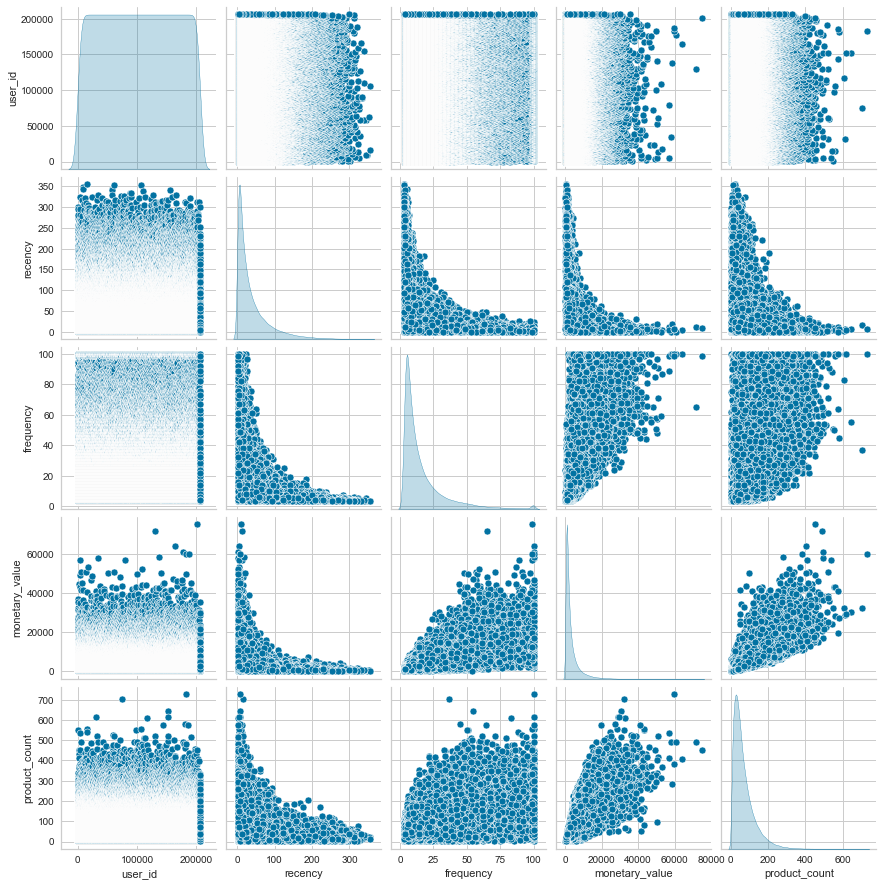

In [20]:
sns.pairplot(data = df, diag_kind = 'kde')

In [21]:
lizt = ['recency', 'frequency','monetary_value','product_count']
dat2 = pd.DataFrame(power_transform(df[lizt], standardize = True), columns = lizt)

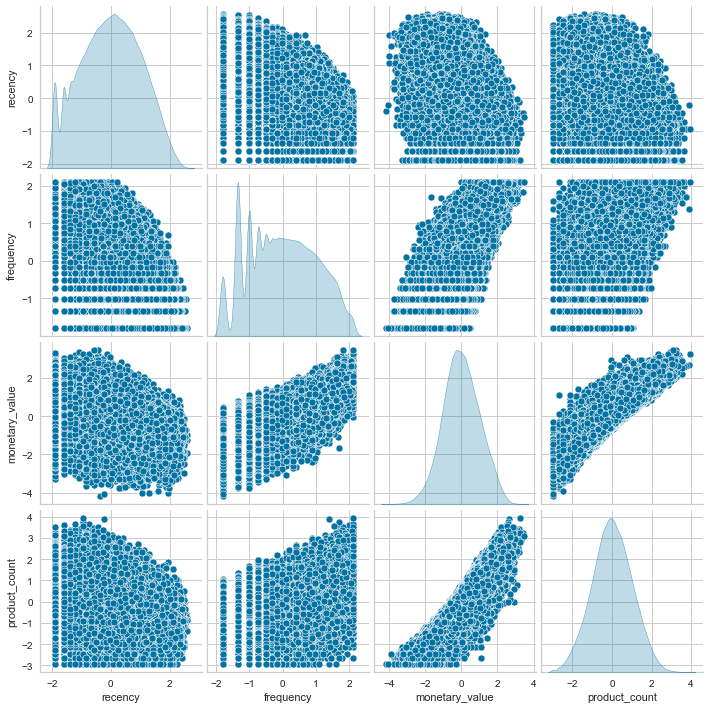

In [22]:
sns.pairplot(data = dat2, diag_kind = 'kde')

In [23]:
df_rfmc = df[lizt]
power =  PowerTransformer(method = 'box-cox', standardize= True)
df_prep = power.fit_transform(df_rfmc)
df_prep

array([[ 1.0703074 ,  0.10471079, -0.3684078 , -1.03717192],
       [ 0.78549984,  0.47252456,  0.79122291,  1.08241025],
       [ 0.13517094,  0.2112106 , -0.10326056, -0.48547842],
       ...,
       [-1.60446175,  0.54504628,  0.87917011,  0.71682971],
       [-0.71838072,  1.61143694,  1.92922662,  1.79236131],
       [-1.18075471,  0.39350312,  0.41411689,  0.40643189]])

# 3. Model building

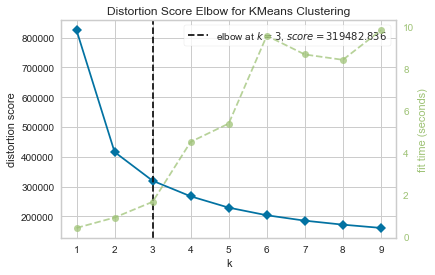

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
kmeans = KMeans()

## Determine optimum cluster number (elbow method)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_prep)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

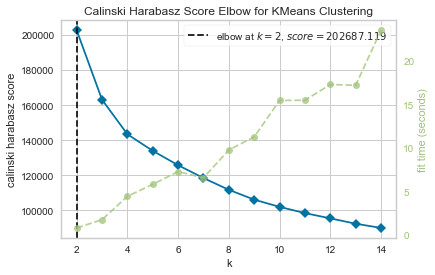

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [25]:
## Determine optimum cluster number (calinski_harabasz)
visualizer3 = KElbowVisualizer(kmeans, k=(2,15), metric='calinski_harabasz')
visualizer3.fit(df_prep)        # Fit the data to the visualizer
visualizer3.show()        # Finalize and render the figure

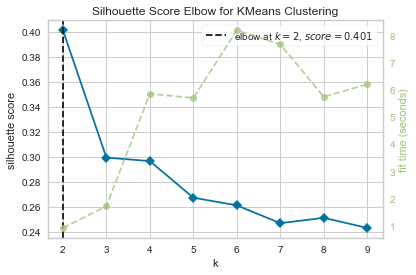

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
## Determine optimum cluster number (Silhouette Analysis)
visualizer2 = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')
visualizer2.fit(df_prep)        # Fit the data to the visualizer
visualizer2.show()        # Finalize and render the figure

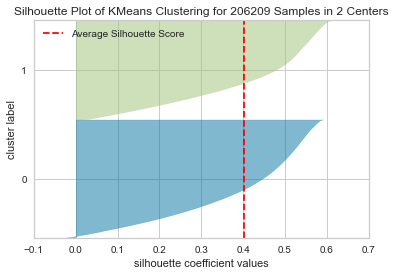

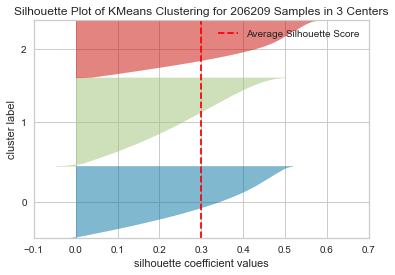

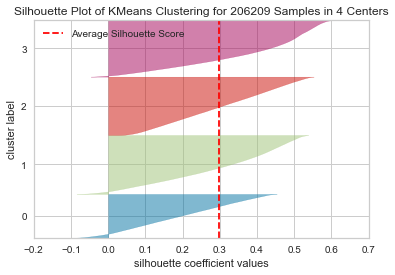

In [27]:
for k in [2,3,4]:
    model = KMeans(k, random_state=42)
    visualizer_ = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer_.fit(df_prep)        # Fit the data to the visualizer
    visualizer_.show()        # Finalize and render the figure

## 3.2 Kmeans (3 clusters)

In [28]:
kmeans_3 = KMeans(n_clusters= 3, random_state = 123) 

In [29]:
%%timeit
kmeans_3.fit(df_prep)

1 s ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
clusters_kmeans3 = kmeans_3.labels_

In [31]:
clusters_kmeans3

array([1, 0, 0, ..., 2, 2, 0])

In [32]:
df_kmeans3 = df.assign(clusters_kmeans3 = clusters_kmeans3)

In [33]:
df_kmeans3.groupby('clusters_kmeans3').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary_value':['mean','count'],
    'product_count':'mean'
}).round(0)

recency frequency monetary_value        product_count
                    mean      mean           mean  count          mean
clusters_kmeans3                                                      
0                   28.0      12.0         2104.0  83932          57.0
1                   73.0       5.0          707.0  67680          25.0
2                   11.0      36.0         8123.0  54597         136.0

## Mini Batch (3 clusters)

In [34]:
mini3 = MiniBatchKMeans(n_clusters=3, random_state=123, batch_size=8)

In [35]:
%%timeit
mini3.fit(df_prep)

16.8 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
clusters_mini3 = mini3.labels_

In [37]:
df_mini3 = df.assign(clusters_mini3 = clusters_mini3)

In [38]:
df_mini3.groupby('clusters_mini3').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary_value':['mean','count'],
    'product_count':'mean'
}).round(0)

recency frequency monetary_value        product_count
                  mean      mean           mean  count          mean
clusters_mini3                                                      
0                 24.0      12.0         1850.0  76478          51.0
1                 13.0      33.0         7563.0  62741         130.0
2                 78.0       5.0          777.0  66990          27.0

In [39]:
df_mini3

,user_id,recency,frequency,monetary_value,product_count,clusters_mini3
0,1,74,11,1217.21,19,2
1,2,54,15,4332.42,121,1
2,3,25,12,1629.83,33,0
3,4,73,5,417.61,17,2
4,5,118,5,889.32,28,2
...,...,...,...,...,...,...
206204,206205,13,4,1049.27,37,0
206205,206206,4,67,5508.60,150,1
206206,206207,2,16,4766.74,92,1
206207,206208,8,49,14795.67,198,1


## BIRCH

In [40]:
brch  = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

In [41]:
%%timeit
brch.fit(df_prep)

2.21 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
cluster_brch = brch.labels_

In [43]:
df_brch = df.assign(cluster_brch = cluster_brch)

In [44]:
df_brch.groupby('cluster_brch').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary_value':['mean','count'],
    'product_count':'mean'
}).round(0)

recency frequency monetary_value        product_count
                mean      mean           mean  count          mean
cluster_brch                                                      
0               63.0       8.0         1743.0  48970          54.0
1               89.0       5.0          508.0  35935          18.0
2               16.0      18.0         3262.0  54197          75.0
3                9.0      43.0        10159.0  35446         159.0
4               12.0       9.0          868.0  31661          26.0

## DBSCAN

In [45]:
## Determine Epsilon using K-distance graph
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_prep)
distances, indices = nbrs.kneighbors(df_prep)

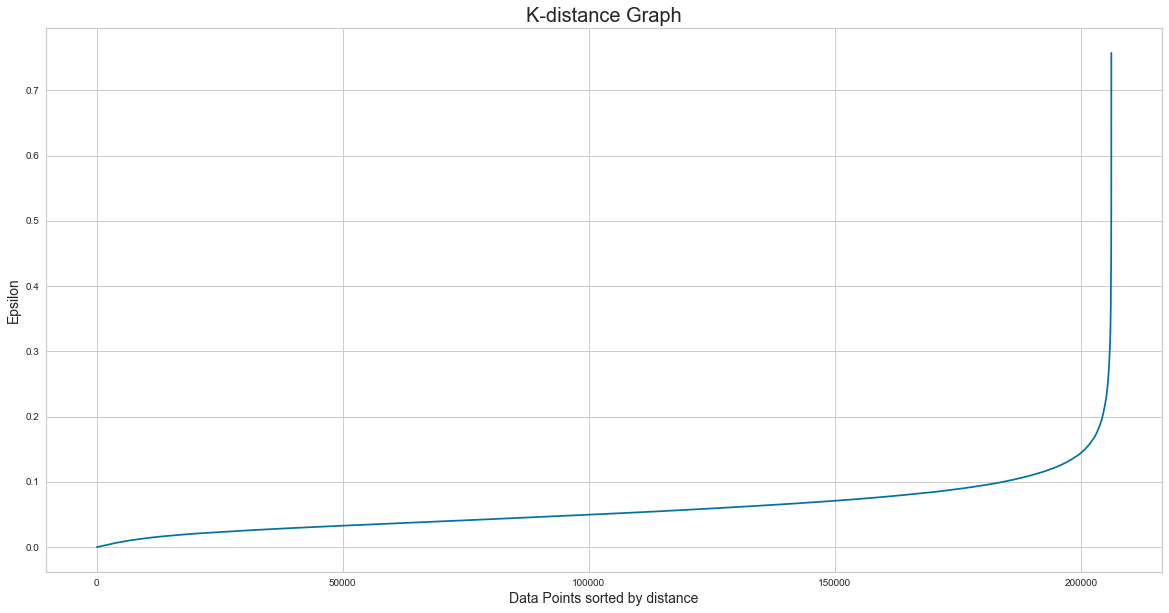

In [46]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [47]:
eps = 0.18
minpts = 8 # 2 * dimensions
dbscan = DBSCAN(eps=eps,min_samples= 8)

In [48]:
%%timeit
dbscan.fit(df_prep)

6.59 s ± 384 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
cluster_dbscan = dbscan.labels_
df_dbscan = df.assign(cluster_dbscan=cluster_dbscan)

In [50]:
dff = df_dbscan.groupby('cluster_dbscan').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary_value':['mean','count'],
    'product_count':'mean'
}).round(0)

In [51]:
dff.head(15)

recency frequency monetary_value         product_count
                  mean      mean           mean   count          mean
cluster_dbscan                                                       
-1                36.0      24.0         4644.0    9967          64.0
 0                26.0      20.0         4076.0  101291          83.0
 1                64.0       5.0          963.0   16981          34.0
 2                96.0       3.0          576.0    7997          23.0
 3                 2.0      34.0         6845.0    6341         114.0
 4                76.0       4.0          764.0   21064          29.0
 5                55.0       6.0         1165.0   14140          39.0
 6                48.0       7.0         1358.0   12019          44.0
 7                 1.0       6.0         1108.0     194          40.0
 8                 3.0      33.0         6660.0    5835         111.0
 9                 1.0      36.0         7231.0    7250         116.0
 10                1.0       7.0          528.0      33          19.0
 11                1.0       5.0         1042.0     210          38.0
 12                3.0       9.0          453.0      34          12.0
 13                1.0       4.0          795.0     204          30.0

# Model Evaluation

## Davies Bouldin

In [52]:
#Kmeans
davies_bouldin_score(df_prep, clusters_kmeans3)

1.1463007114086354

In [53]:
#Mini Batch
davies_bouldin_score(df_prep, clusters_mini3)

1.1903710151875855

In [54]:
#BIRCH
davies_bouldin_score(df_prep, cluster_brch)

1.1241133580978615

In [55]:
#DBSCAN
davies_bouldin_score(df_prep, cluster_dbscan)

2.1390923628313625

## Calinski-Harabasz Index

In [56]:
#Kmeans
calinski_harabasz_score(df_prep, clusters_kmeans3)

163088.07312241523

In [57]:
#Mini Batch
calinski_harabasz_score(df_prep, clusters_mini3)

159839.45546285118

In [58]:
#BIRCH
calinski_harabasz_score(df_prep, cluster_brch)

132460.23614381286

In [59]:
#DBSCAN
calinski_harabasz_score(df_prep, cluster_dbscan)

2058.8593830606665

## Silhouette Score

In [60]:
#Kmeans
silhouette_score(df_prep, clusters_kmeans3)

0.2993430138204524

In [61]:
#Mini Batch
silhouette_score(df_prep, clusters_mini3)

0.29275235057221527

In [62]:
#BIRCH
silhouette_score(df_prep, cluster_brch)

0.26246728068408043

In [63]:
#DBSCAN
silhouette_score(df_prep, cluster_dbscan)

-0.3353452939277498